# Evaluation of BERT
### Reference 
tutorial on ktrain: https://github.com/amaiya/ktrain
Finetune tutorial: https://towardsdatascience.com/ktrain-a-lightweight-wrapper-for-keras-to-help-train-neural-networks-82851ba889c

In [ ]:
##connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 168kB/s 
     |████████████████████████████████| 6.8MB 38.2MB/s 
     |████████████████████████████████| 983kB 35.0MB/s 
     |████████████████████████████████| 266kB 39.8MB/s 
     |████████████████████████████████| 1.9MB 28.0MB/s 
     |████████████████████████████████| 1.2MB 36.0MB/s 
     |████████████████████████████████| 471kB 40.0MB/s 
     |████████████████████████████████| 890kB 37.7MB/s 
     |████████████████████████████████| 3.2MB 34.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.1-cp37-none-any.whl size=25277418 sha256=86f71ba803f8ef90829ceacae3c4bf940f10c8d31465e69da2e9722671568de4
  Stored in directory: /root/.cache/pip/wheels/5f/e6/26/e587644c4f5bd1a32d24d7bda0b132f8f2d4dfbe0bca62fe70
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=79fed73aad87fdd2a85d0a047ecd6918a0cb4bcb4a2b6a8cf40f81e0eb277039
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
predictor = ktrain.load_predictor('/content/gdrive/MyDrive/Depression Project/BERT')

In [ ]:
# change file path 
data2=pd.read_csv("/content/gdrive/MyDrive/Depression Project/Test_Dataset.csv")
data2= data2.astype(str)
data2.head()

,Id,Text,Target
0,2.9e+17,social life,0
1,2.9e+17,good friends,1
2,2.85e+17,listening love cause hate life,0
3,2.9e+17,love never gets bored,1
4,2.9e+17,best boyfriend ever,1


In [ ]:
from numpy import nan
text2 = data2['Text'].values.tolist()
target2 = data2["Target"].values.tolist()
print(target2)
print (text2)

['0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0',

In [ ]:
data2.shape

(1763, 3)

In [ ]:
pred2 = predictor.predict(text2)

In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "0" and pred2[i] =="0":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  social life --> Actual Label:  0 --> Predicted:  0
Text:  listening love cause hate life --> Actual Label:  0 --> Predicted:  0
Text:  wow suck --> Actual Label:  0 --> Predicted:  0
Text:  life series unfounate fworded events --> Actual Label:  0 --> Predicted:  0
Text:  yes i sad --> Actual Label:  0 --> Predicted:  0
Text:  i made like worst mistakes ever --> Actual Label:  0 --> Predicted:  0
Text:  fword life --> Actual Label:  0 --> Predicted:  0
Text:  new resolution drink life fword terrible --> Actual Label:  0 --> Predicted:  0
Text:  fword sword fword life hate fword dad fword --> Actual Label:  0 --> Predicted:  0
Text:  want alone miserable life u wanna make fun i fully aware existence --> Actual Label:  0 --> Predicted:  0
Text:  stressed could --> Actual Label:  0 --> Predicted:  0
Text:  i really unhappy try --> Actual Label:  0 --> Predicted:  0
Text:  i never sick life --> Actual Label:  0 --> Predicted:  0
Text:  hate feel alone --> Actual Label:  0 --> Predic

In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "1" and pred2[i] =="1":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  good friends --> Actual Label:  1 --> Predicted:  1
Text:  love never gets bored --> Actual Label:  1 --> Predicted:  1
Text:  best boyfriend ever --> Actual Label:  1 --> Predicted:  1
Text:  god bless --> Actual Label:  1 --> Predicted:  1
Text:  i ame life i loving every single moment --> Actual Label:  1 --> Predicted:  1
Text:  i feeling great --> Actual Label:  1 --> Predicted:  1
Text:  love life --> Actual Label:  1 --> Predicted:  1
Text:  love looking --> Actual Label:  1 --> Predicted:  1
Text:  feel like proud parent --> Actual Label:  1 --> Predicted:  1
Text:  introve love --> Actual Label:  1 --> Predicted:  1
Text:  goals life --> Actual Label:  1 --> Predicted:  1
Text:  i never many emotional days life good --> Actual Label:  1 --> Predicted:  1
Text:  little bit still love life --> Actual Label:  1 --> Predicted:  1
Text:  good thanks asking --> Actual Label:  1 --> Predicted:  1
Text:  want --> Actual Label:  1 --> Predicted:  1
Text:  may get want get need i

In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "0" and pred2[i] =="1":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  i love --> Actual Label:  0 --> Predicted:  1
Text:  i good --> Actual Label:  0 --> Predicted:  1
Text:  i feeling good --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  i really happy --> Actual Label:  0 --> Predicted:  1
Text:  i good man --> Actual Label:  0 --> Predicted:  1
Text:  i happy --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  nan --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
10


In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "1" and pred2[i] =="0":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  life --> Actual Label:  1 --> Predicted:  0
Text:  need --> Actual Label:  1 --> Predicted:  0
Text:  perfect --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  fword life --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  good life --> Actual Label:  1 --> Predicted:  0
Text:  life --> Actual Label:  1 --> Predicted:  0
Text:  life --> Actual Label:  1 --> Predicted:  0
Text:  i comfoable --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
11


In [ ]:
BERT = "BERT Model\n"

BERTtitle = BERT.title()
print(BERTtitle)
CmBERT = confusion_matrix(target2,pred2)
print(confusion_matrix(target2,pred2))
print(classification_report(target2,pred2))
print("Accuracy: ", accuracy_score(target2, pred2))
print("F1: ", f1_score(target2, pred2, pos_label='1'))
print("Precision: ", precision_score(target2, pred2, pos_label='1'))
print("Recall: ", recall_score(target2, pred2, pos_label='1'))

Bert Model

[[807  10]
 [ 11 935]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      0.99      0.99       946

    accuracy                           0.99      1763
   macro avg       0.99      0.99      0.99      1763
weighted avg       0.99      0.99      0.99      1763

Accuracy:  0.9880884855360181
F1:  0.9888947646747753
Precision:  0.9894179894179894
Recall:  0.9883720930232558


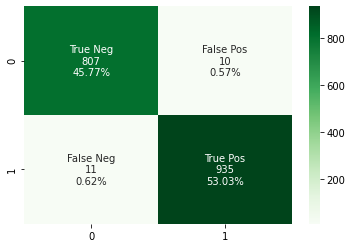

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CmBERT.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CmBERT.flatten()/np.sum(CmBERT)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CmBERT, annot=labels, fmt='', cmap='Greens')